<a href="https://colab.research.google.com/github/Annmary2347211/NNDL/blob/main/Annmary_211_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Exploring Activation Functions in Neural Networks**





In [ ]:
import pandas as pd

data = pd.read_csv('/content/Titanic - Titanic (1).csv')
print(data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


1. Implement and Visualize Activation Functions:


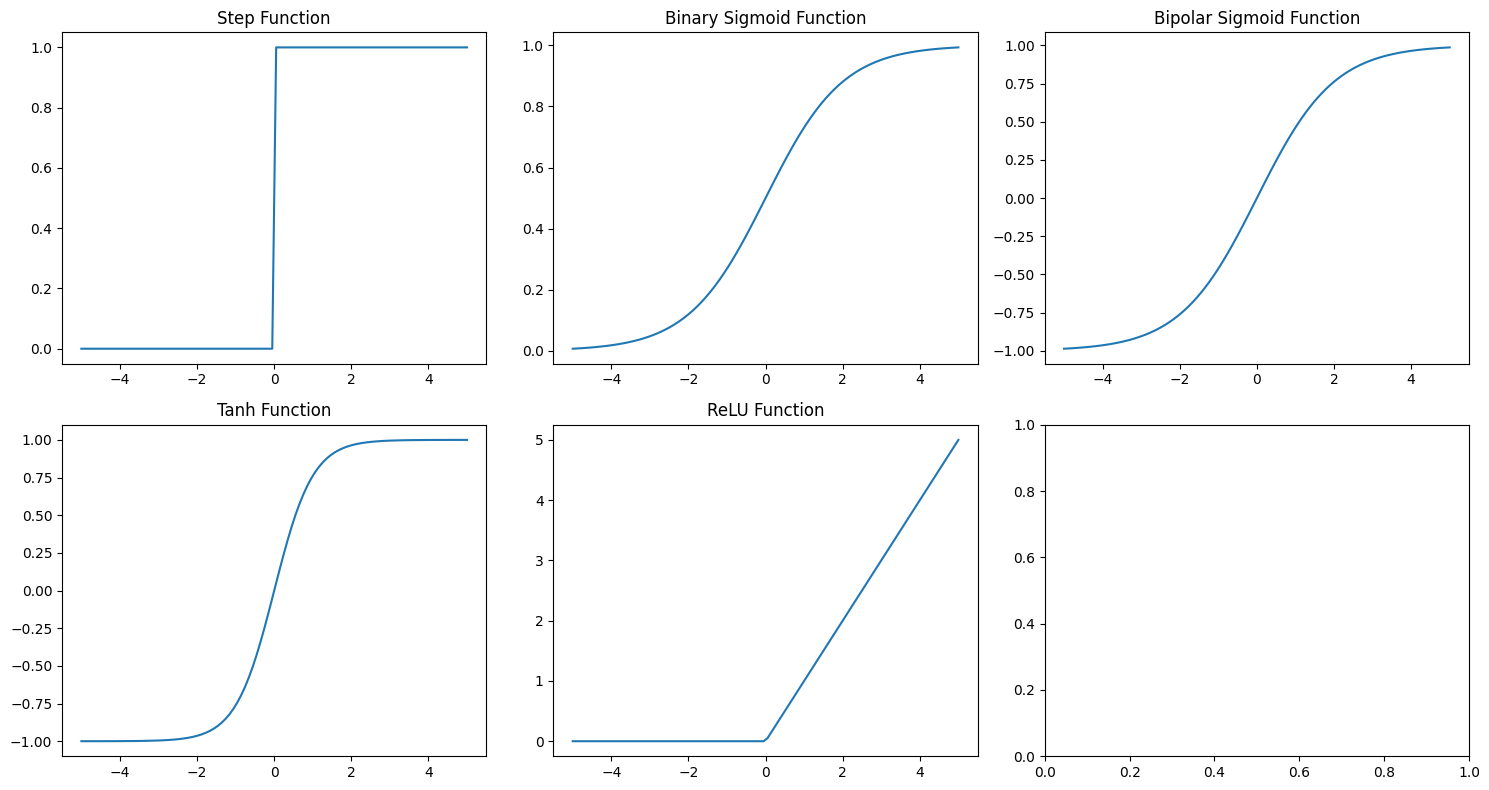

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
  return 1 if x >= 0 else 0

def sigmoid_function_binary(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_function_bipolar(x):
  return (1 - np.exp(-x)) / (1 + np.exp(-x))

def tanh_function(x):
  return np.tanh(x)

def relu_function(x):
  return max(0, x)

# Generate x values for plotting
x = np.linspace(-5, 5, 100)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Step Function
axes[0, 0].plot(x, [step_function(val) for val in x])
axes[0, 0].set_title('Step Function')

# Binary Sigmoid Function
axes[0, 1].plot(x, sigmoid_function_binary(x))
axes[0, 1].set_title('Binary Sigmoid Function')

# Bipolar Sigmoid Function
axes[0, 2].plot(x, sigmoid_function_bipolar(x))
axes[0, 2].set_title('Bipolar Sigmoid Function')

# Tanh Function
axes[1, 0].plot(x, tanh_function(x))
axes[1, 0].set_title('Tanh Function')

# ReLU Function
axes[1, 1].plot(x, [relu_function(val) for val in x])
axes[1, 1].set_title('ReLU Function')

# Adjust layout and display
plt.tight_layout()
plt.show()


**2. Implement a Simple Neural Network:**



 • Create a simple neural network with one hidden layer using each activation
function (sigmoid, tanh, and ReLU).




In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import pandas as pd

data = pd.read_csv('/content/Titanic - Titanic (1).csv')
print(data.head())


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a neural network with one hidden layer and sigmoid activation
mlp_sigmoid = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', max_iter=1000, random_state=42)
mlp_sigmoid.fit(X_train, y_train)

# a neural network with one hidden layer and tanh activation
mlp_tanh = MLPClassifier(hidden_layer_sizes=(10,), activation='tanh', max_iter=1000, random_state=42)
mlp_tanh.fit(X_train, y_train)

# a neural network with one hidden layer and ReLU activation
mlp_relu = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42)
mlp_relu.fit(X_train, y_train)

# Predict on the test set
y_pred_sigmoid = mlp_sigmoid.predict(X_test)
y_pred_tanh = mlp_tanh.predict(X_test)
y_pred_relu = mlp_relu.predict(X_test)

# Evaluate the performance of each model
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
accuracy_tanh = accuracy_score(y_test, y_pred_tanh)
accuracy_relu = accuracy_score(y_test, y_pred_relu)

print("Accuracy with Sigmoid activation:", accuracy_sigmoid)
print("Accuracy with Tanh activation:", accuracy_tanh)
print("Accuracy with ReLU activation:", accuracy_relu)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Ac

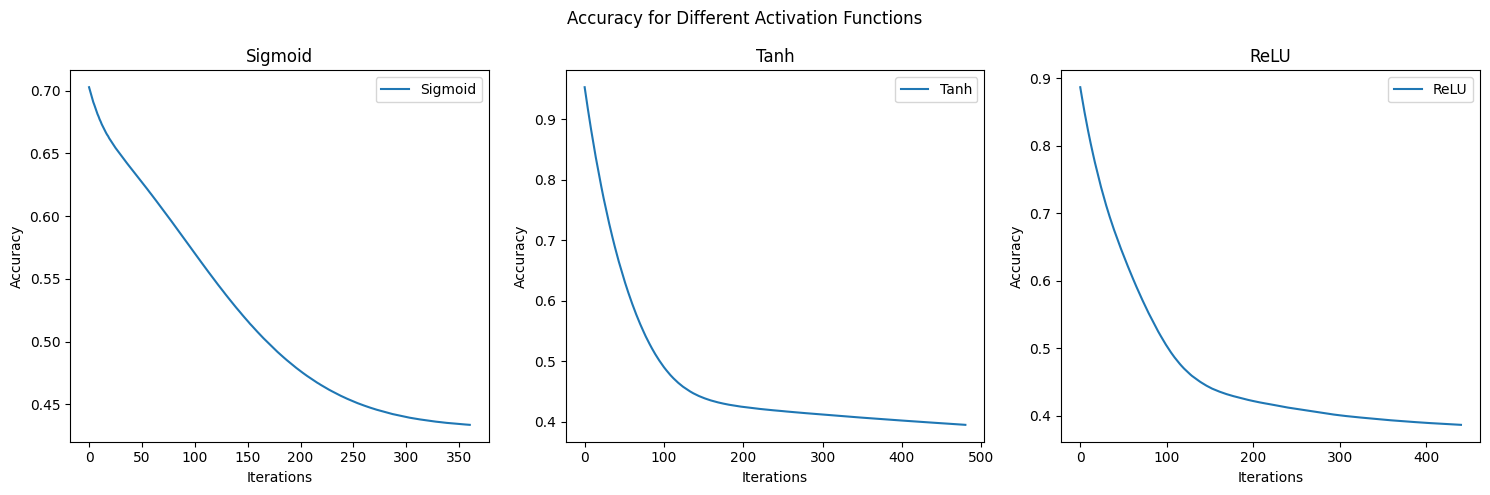

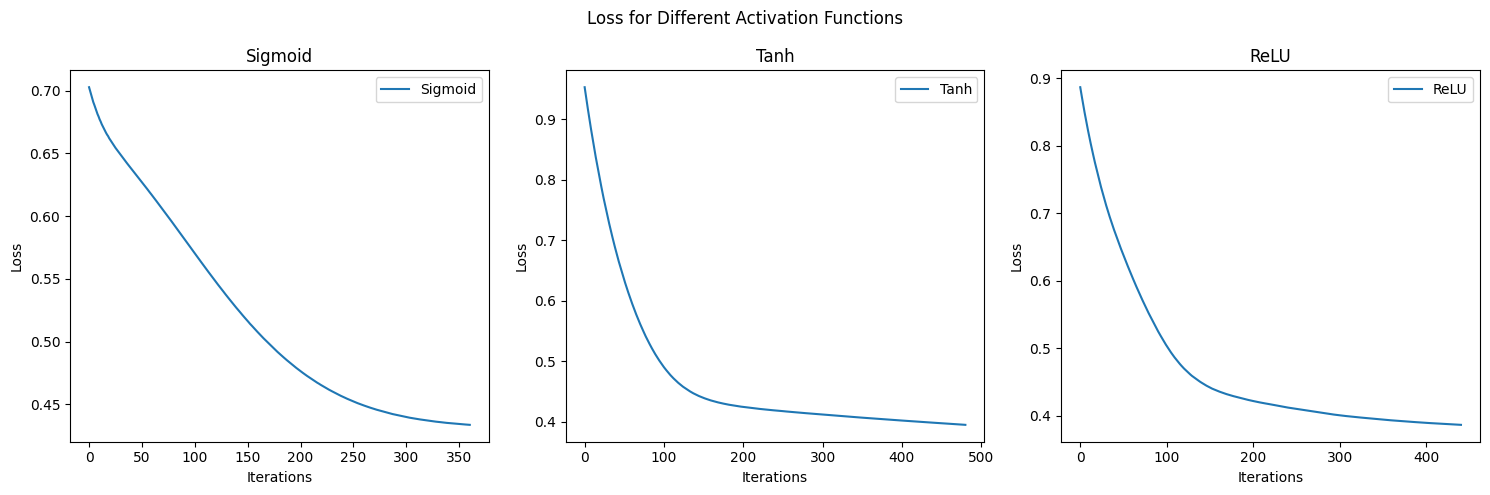

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Accuracy for Different Activation Functions')

# Plot accuracy for sigmoid
axes[0].plot(mlp_sigmoid.loss_curve_, label='Sigmoid')
axes[0].set_xlabel('Iterations')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Sigmoid')
axes[0].legend()

# Plot accuracy for tanh
axes[1].plot(mlp_tanh.loss_curve_, label='Tanh')
axes[1].set_xlabel('Iterations')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Tanh')
axes[1].legend()

# Plot accuracy for relu
axes[2].plot(mlp_relu.loss_curve_, label='ReLU')
axes[2].set_xlabel('Iterations')
axes[2].set_ylabel('Accuracy')
axes[2].set_title('ReLU')
axes[2].legend()

plt.tight_layout()
plt.show()



# Create subplots for loss
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Loss for Different Activation Functions')

# Plot loss for sigmoid
axes[0].plot(mlp_sigmoid.loss_curve_, label='Sigmoid')
axes[0].set_xlabel('Iterations')
axes[0].set_ylabel('Loss')
axes[0].set_title('Sigmoid')
axes[0].legend()

# Plot loss for tanh
axes[1].plot(mlp_tanh.loss_curve_, label='Tanh')
axes[1].set_xlabel('Iterations')
axes[1].set_ylabel('Loss')
axes[1].set_title('Tanh')
axes[1].legend()

# Plot loss for relu
axes[2].plot(mlp_relu.loss_curve_, label='ReLU')
axes[2].set_xlabel('Iterations')
axes[2].set_ylabel('Loss')
axes[2].set_title('ReLU')
axes[2].legend()

plt.tight_layout()
plt.show()


• Train the network on a binary classification task (e.g., XOR problem) using a
small dataset.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Your student data
students_data = [
    [85, 18, "pass"],
    [45, 19, "fail"],
    [75, 20, "pass"],
    [50, 22, "fail"],
    [90, 18, "pass"],
    [65, 21, "pass"],
    [30, 19, "fail"],
    [80, 20, "pass"],
    [40, 21, "fail"],
    [95, 22, "pass"]
]

# Convert the data to a DataFrame
df = pd.DataFrame(students_data, columns=['score', 'age', 'result'])

# Convert 'result' to numerical values (pass: 1, fail: 0)
df['result'] = df['result'].map({'pass': 1, 'fail': 0})

# Separate features (X) and target (y)
X = df[['score', 'age']]
y = df['result']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an MLP classifier with a single hidden layer and ReLU activation
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42)

# Train the network
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


• Compare the performance of the neural network with different activation
functions.

Overall:
- Comparing the accuracy scores reveals the effectiveness of different activation
functions on the specific dataset.
- The plots of loss vs. iterations also help understand the training process
for each activation function.
- Typically, ReLU often outperforms sigmoid and tanh in many situations due to
its computational efficiency and gradient properties. However, the best choice of activation function can vary depending on the data, task, and network
architecture.
In general, based on the plots:
- ReLU often shows faster convergence and lower final loss compared to
Sigmoid and Tanh. This suggests that ReLU might be a better choice for this particular task (student pass/fail classification).